In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA(Exploratory Data Analysis)

In [67]:
target_col = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket','Cabin']

In [68]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### univariate analysis

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


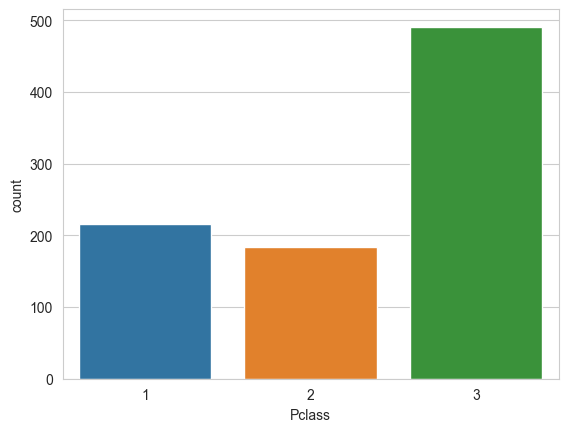

Sex
female    314
male      577
Name: Sex, dtype: int64


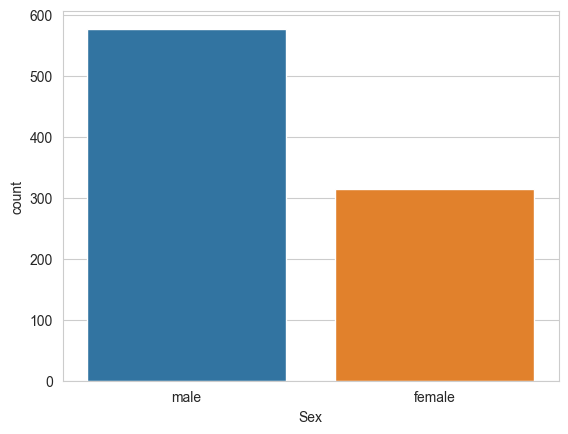

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


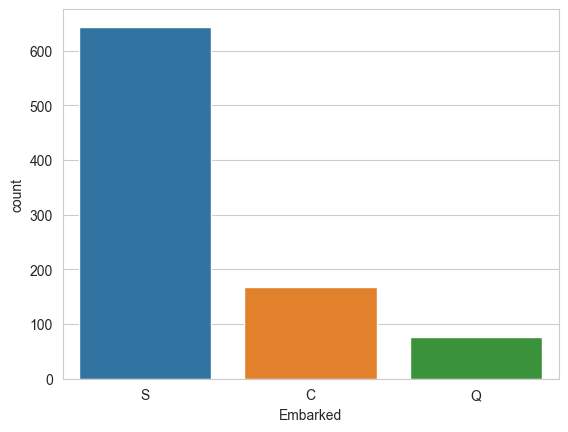

In [69]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

Age


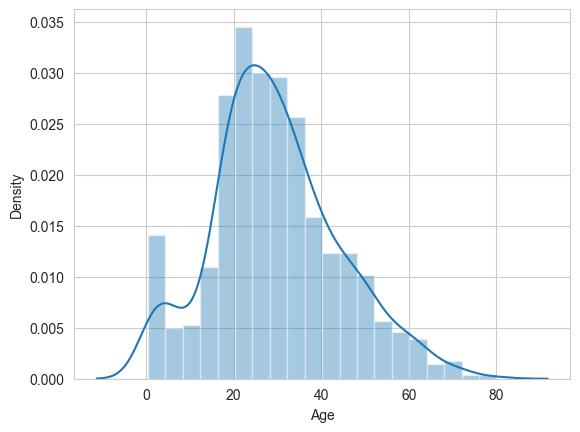

SibSp


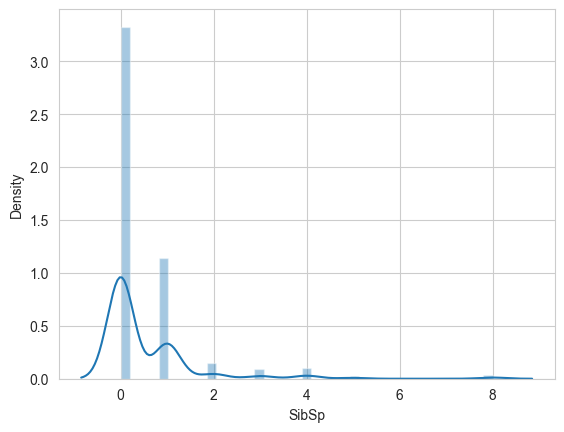

Parch


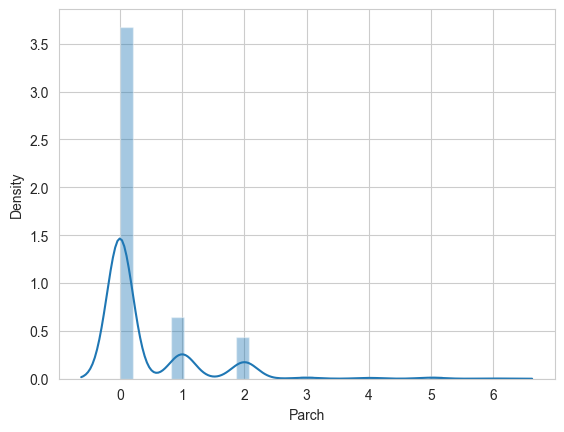

Fare


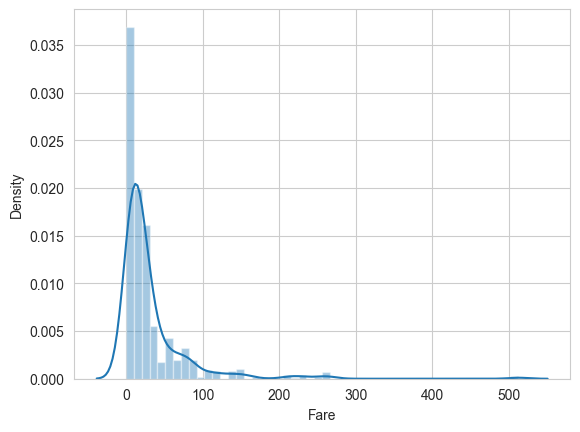

In [70]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

# Bivariate analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


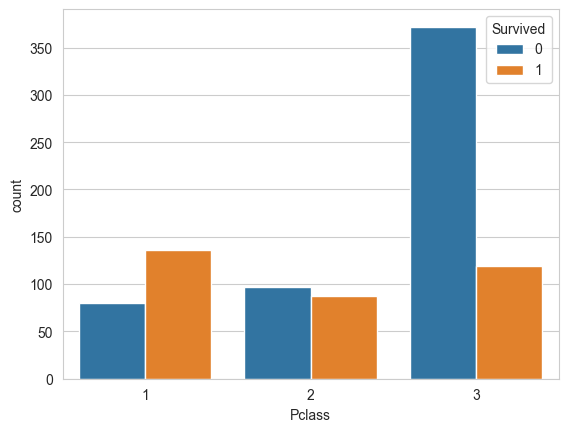

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


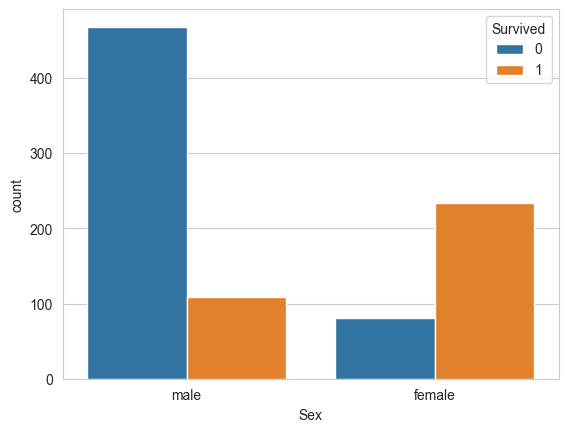

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


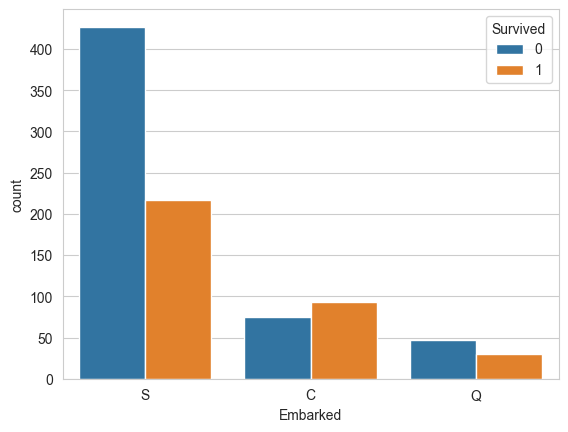

In [71]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age


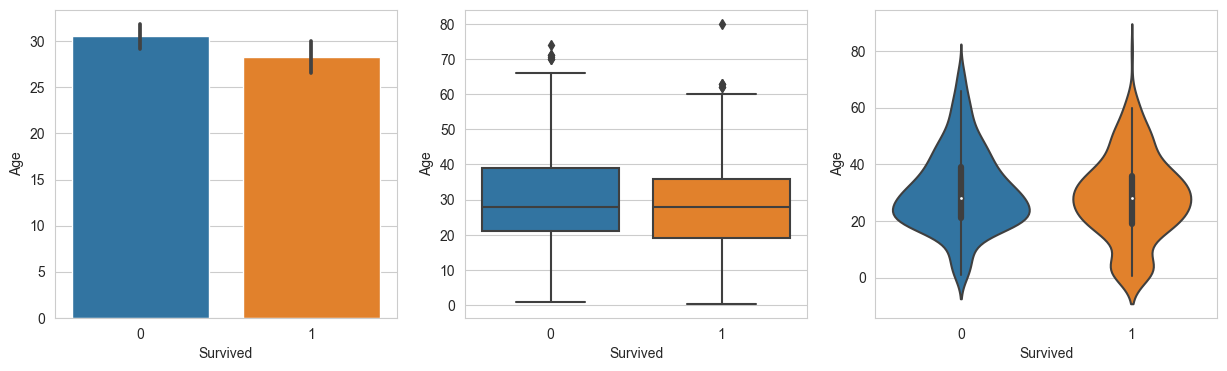

SibSp


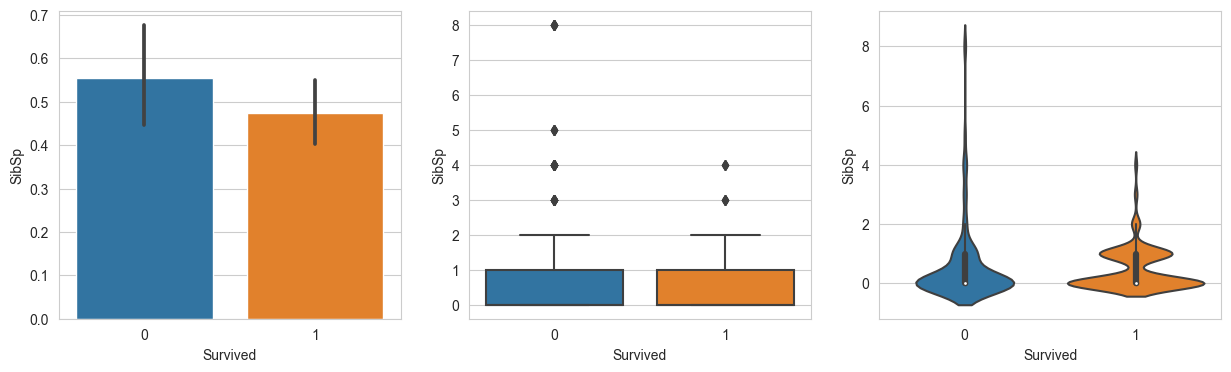

Parch


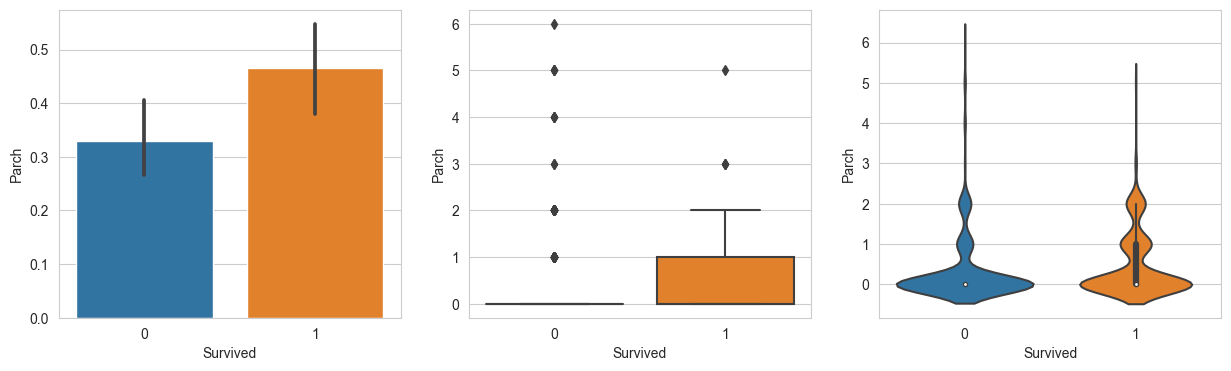

Fare


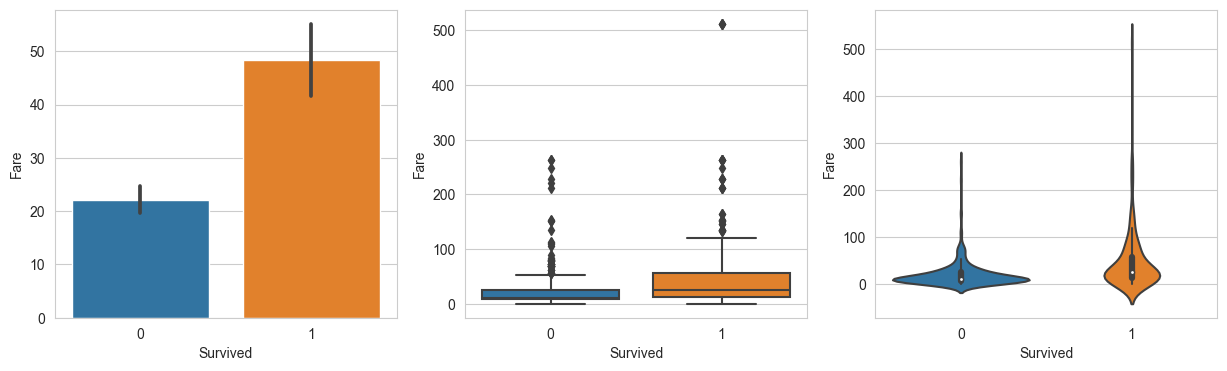

In [72]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

<AxesSubplot: >

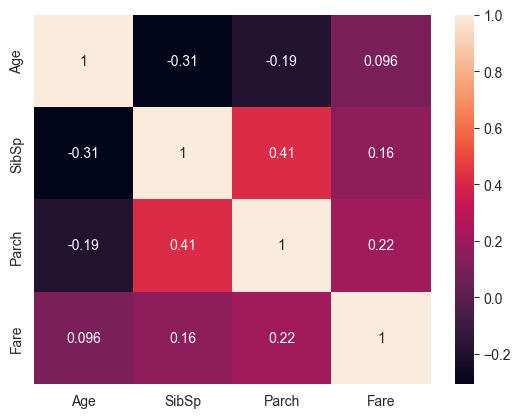

In [73]:
sns.heatmap(df[num_cols].corr(),annot=True)

# Multivaraiate

In [74]:
from random import choice
p_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']


Age


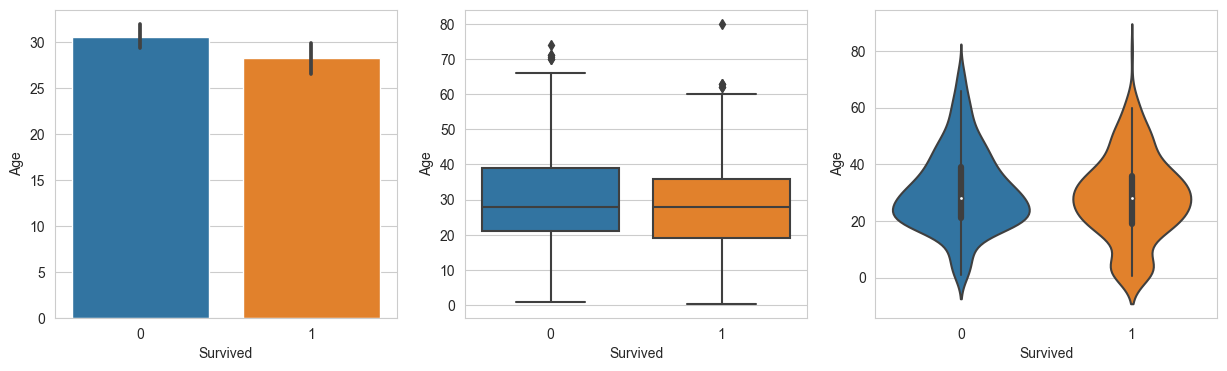

SibSp


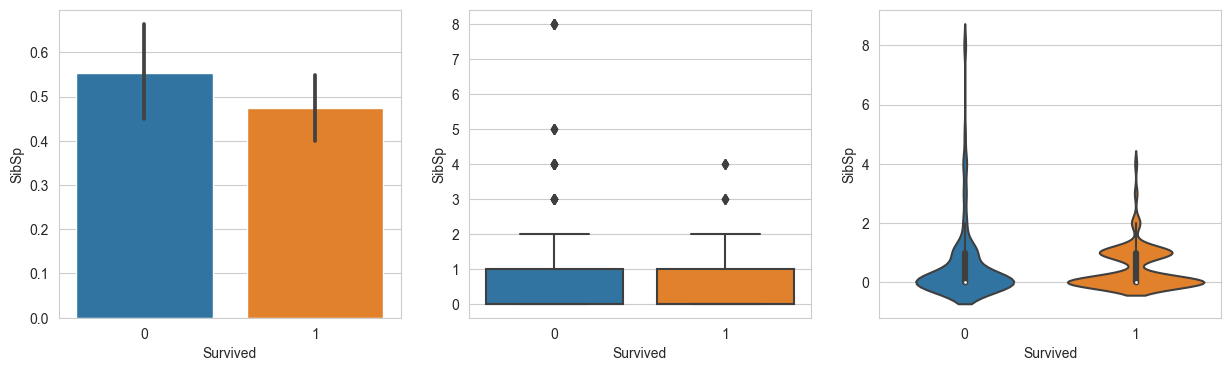

Parch


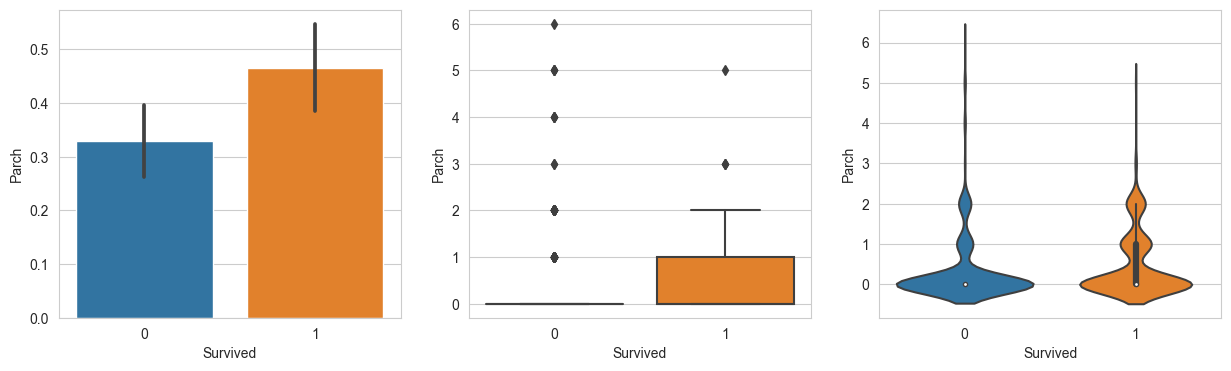

Fare


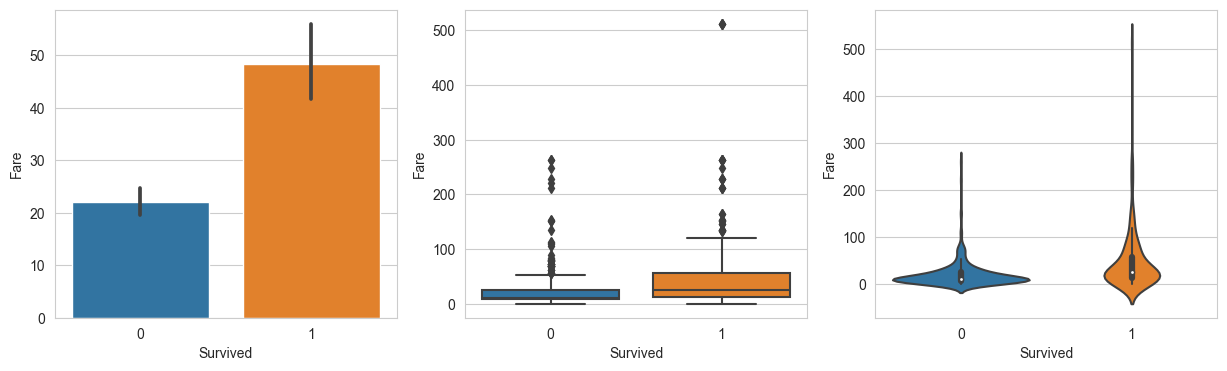

In [75]:
def num_multivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col,y=col)
    plt.show()

for col in num_cols:
    num_bivariate(col)

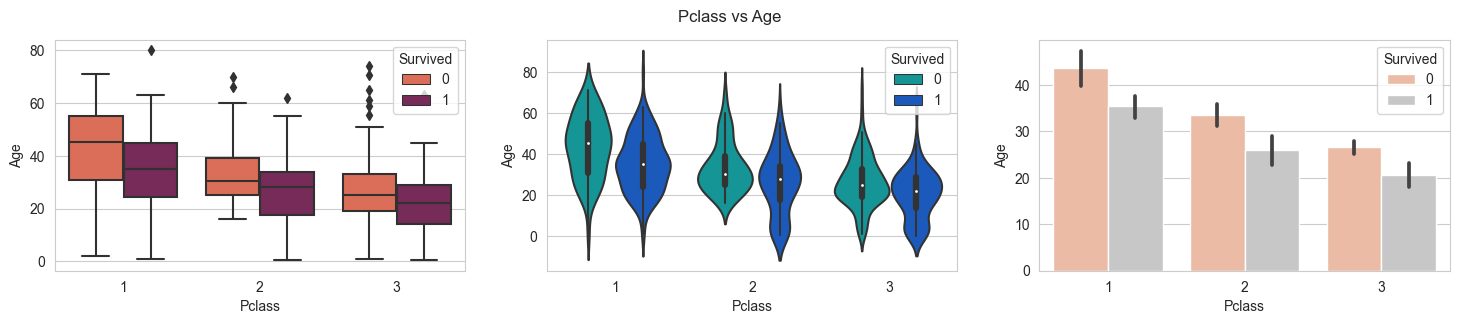

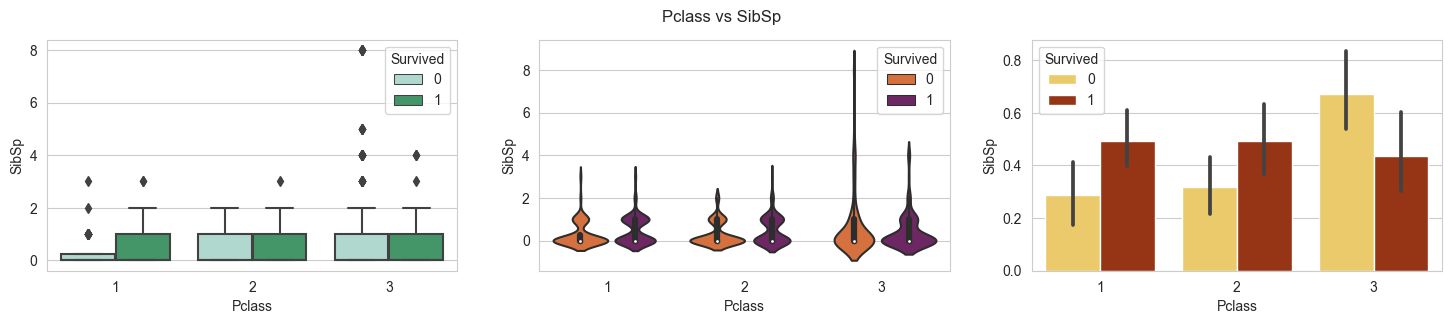

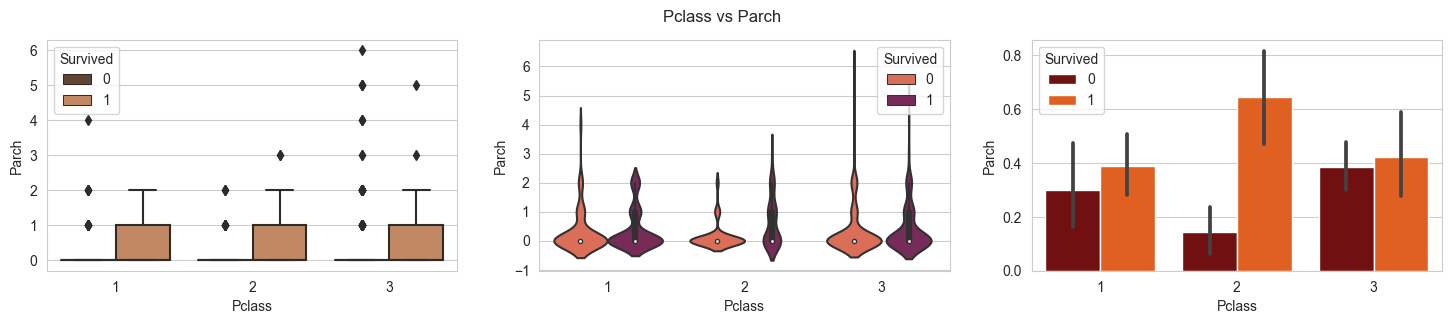

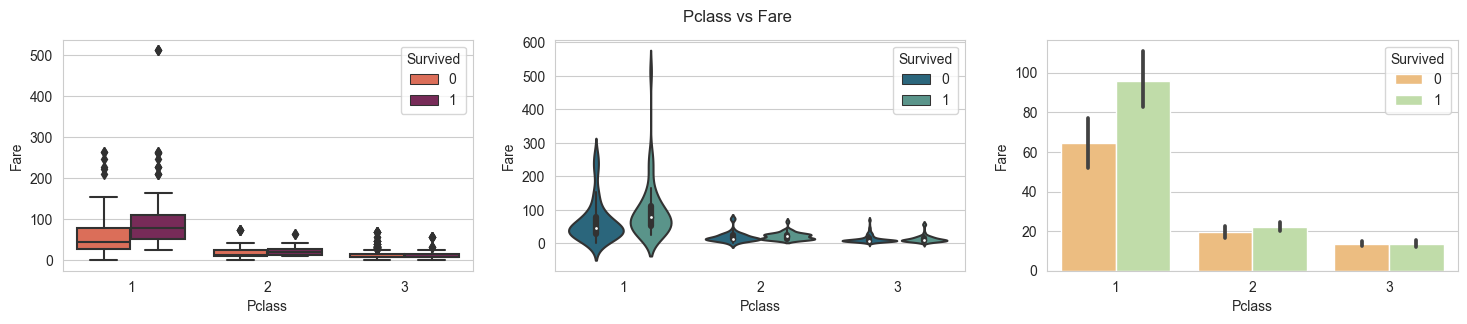

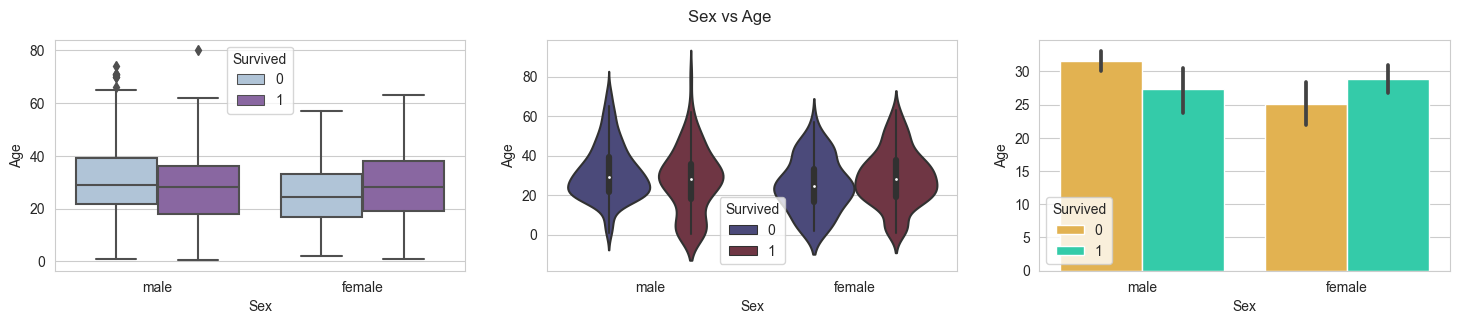

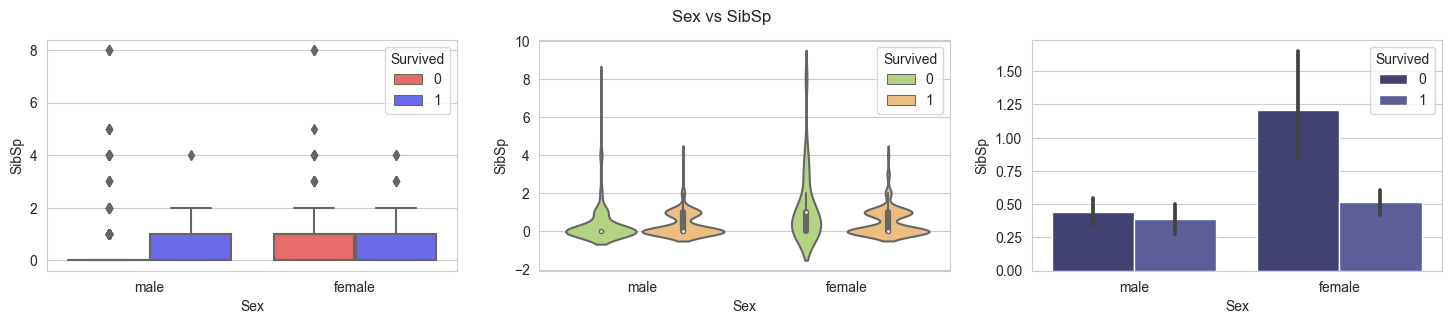

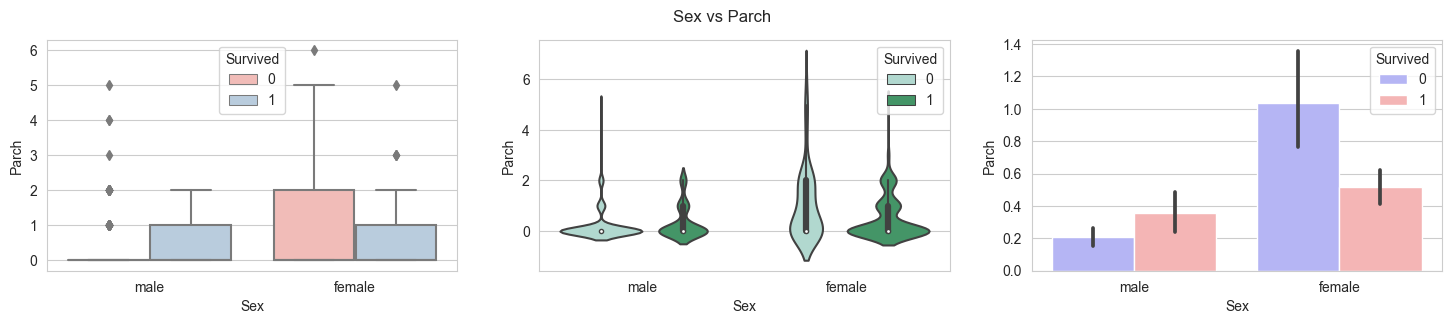

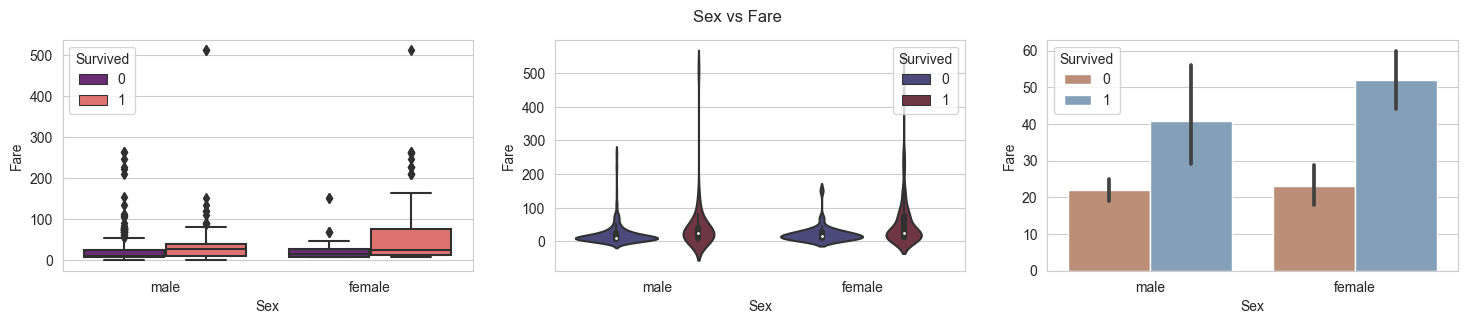

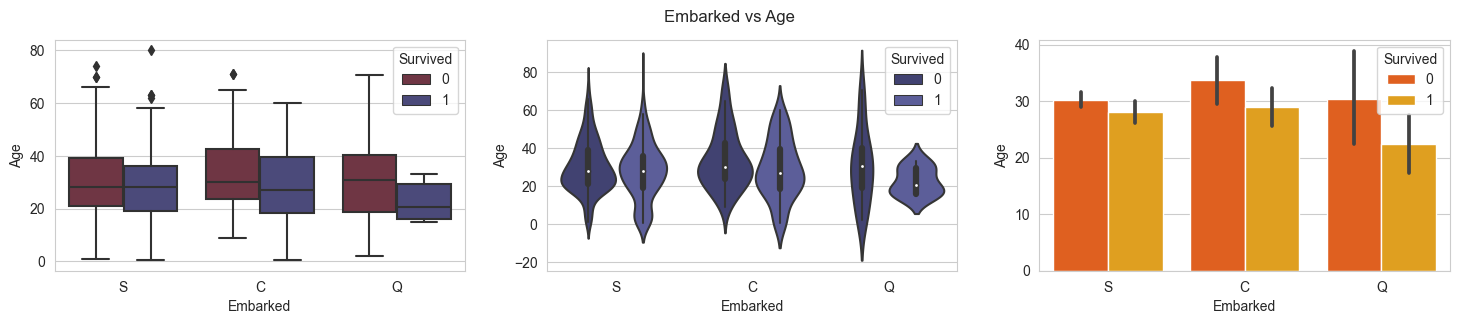

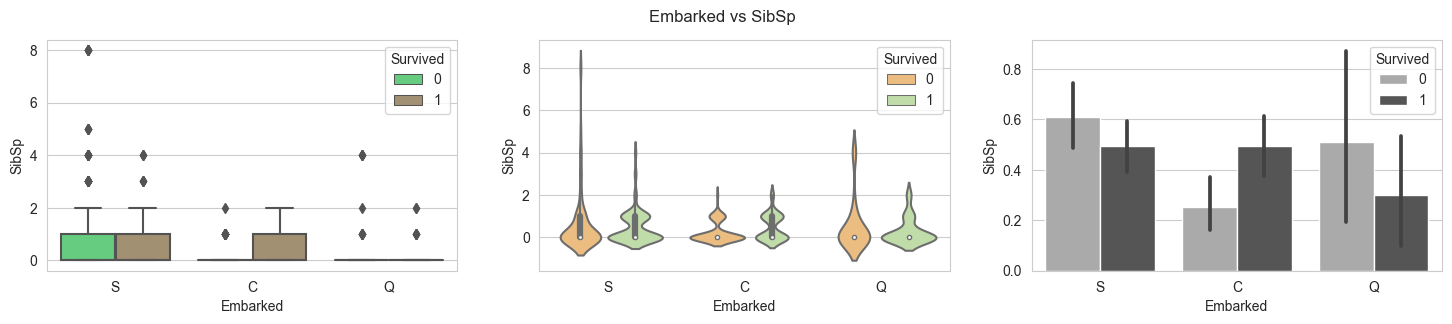

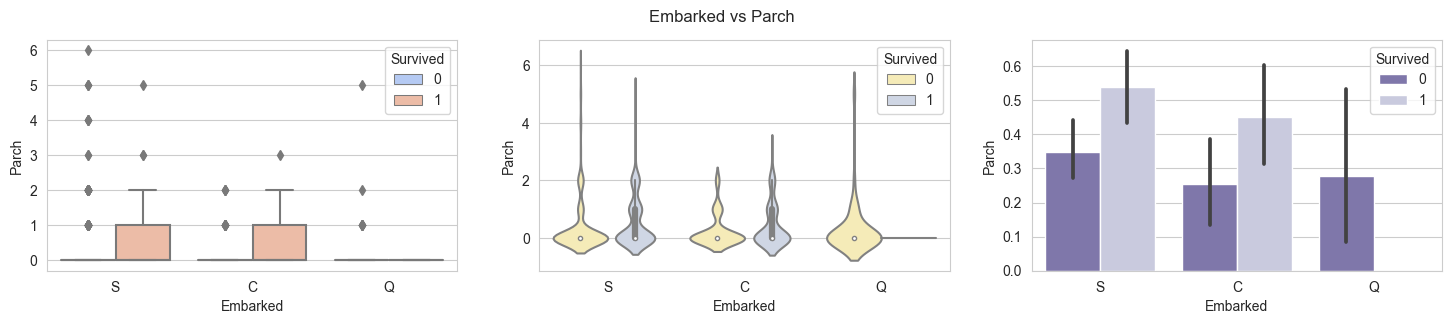

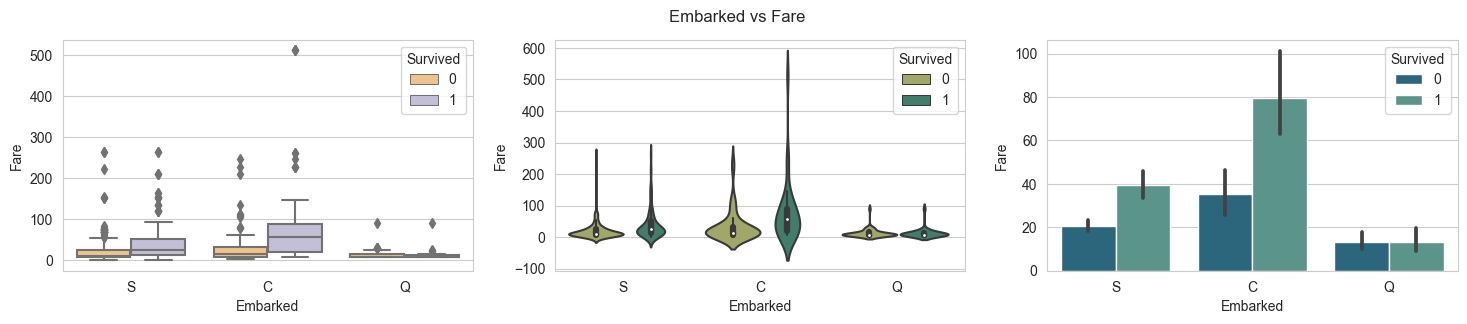

In [76]:
for col in cat_cols:
    if col == target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(
            data=df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.show()

### Missing data installation


In [77]:
# Missing Data Identification
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing Data Strategy
- identify missing data
- discard the column having too much of missing data(>25%)
- discard the rows having missing entries,if the missing entries are too less(<5%)
- treat/impute the missing entries
    - try to fill fake entries which does not impact overall data
        - fill using mean values(numerical data)
        - fill using spme imputers (categorial data)
                


<AxesSubplot: >

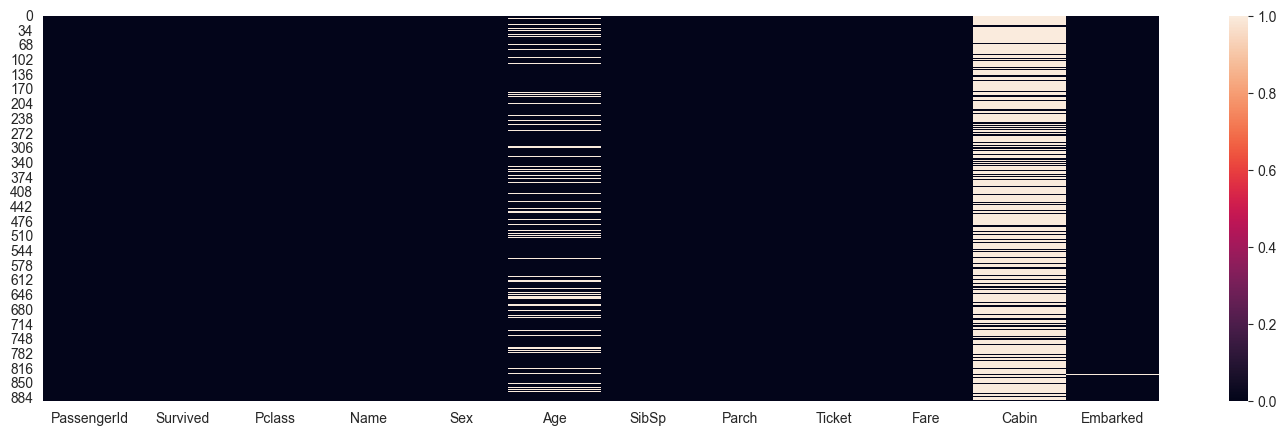

In [80]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [81]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot: >

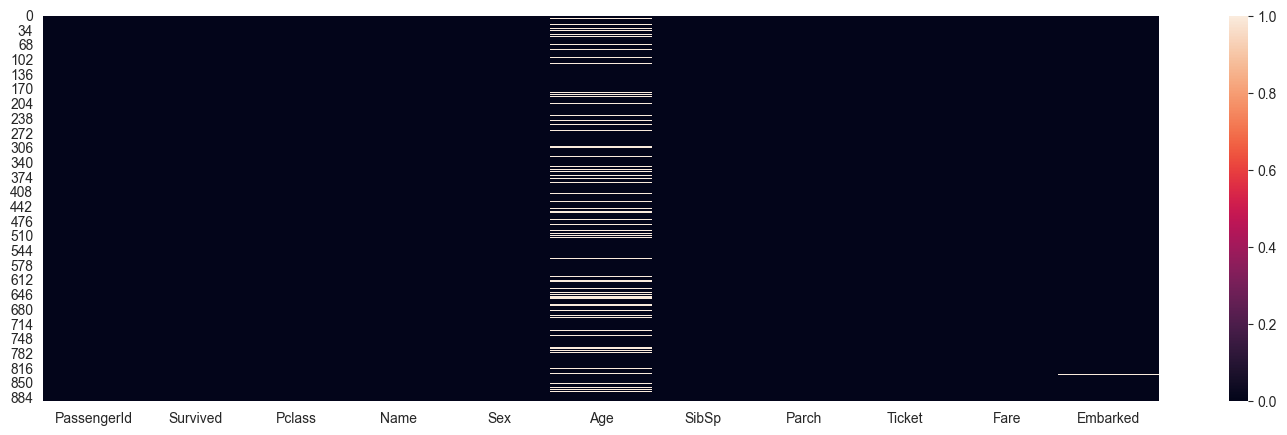

In [82]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [83]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

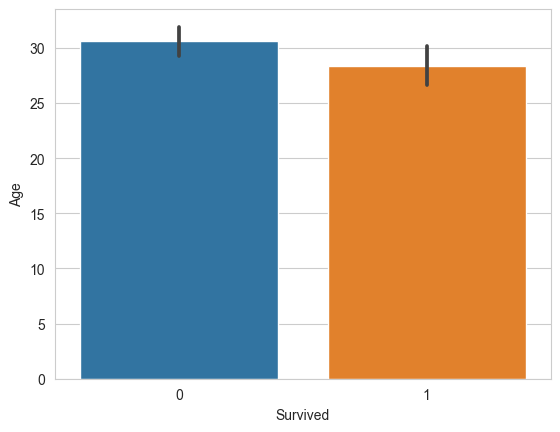

In [84]:
sns.barplot(data=df, x='Survived', y='Age')

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
df['Age'].mean()

29.69911764705882

In [87]:
df['Age'].fillna(df['Age'].mean()).mean()

29.69911764705882

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

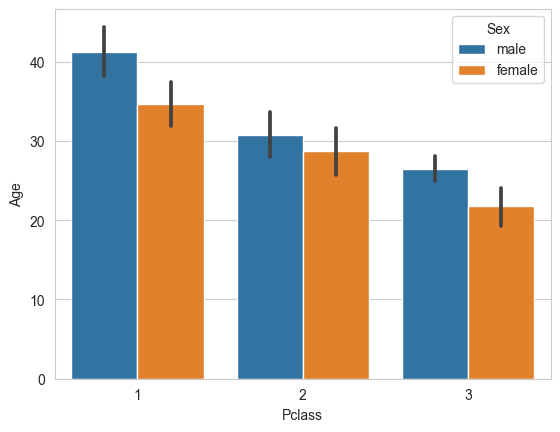

In [88]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: >

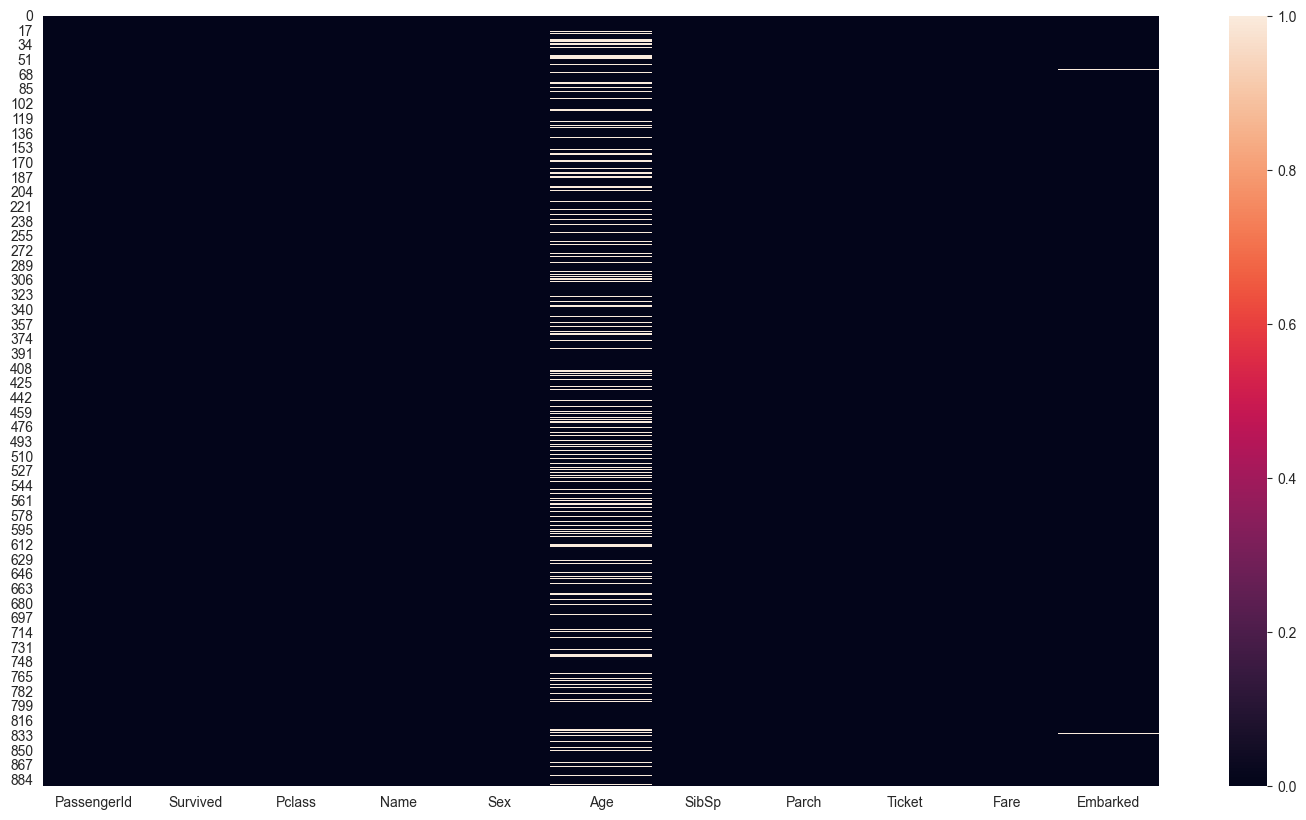

In [90]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

In [91]:
# Dropping missing entries which were very less (in Embarked Column)
df.dropna(inplace=True)

<AxesSubplot: >

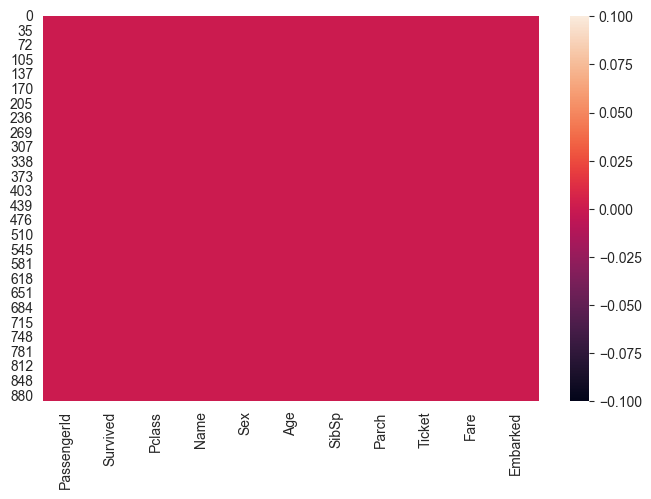

In [92]:
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))


In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
data = pd.get_dummies(df).drop('Sex_female',axis=1)

In [95]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
target = data[target_col]
features = data.drop(target_col, axis=1)

In [97]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [98]:
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Why we decided Logistic Regression?

1. Initially we thought of doing with Pairplot, but since its a categorical data in target, its not helpful
2. Since its binary categorical target and Features are mixtures of numerical and categorical both, then I can think of Logistic Regression (Classification)

Machine Learning Template


### data splitting

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

Model Creation & Training


In [100]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

Model Evaluation

In [101]:
print(round(100 * model.score(xtest, ytest)),'%')

77 %


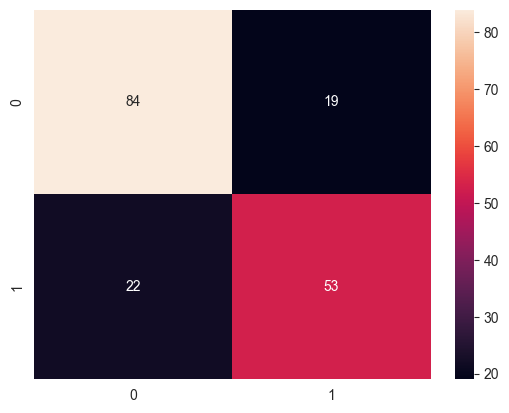

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       103
           1       0.74      0.71      0.72        75

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [102]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred), annot = True, fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))

In [103]:
pd.Series(ytest_pred).value_counts()

0    106
1     72
dtype: int64

# improving the model

1. by balancing the dataset
2. by hyper parameter
3. cross validation

In [104]:
# printing class weight/hyperparam
model1=LogisticRegression(class_weight={0:0.2,1:1},random_state=101)
model1.fit(xtrain,ytrain)
print(classification_report(ytest,model1.predict(xtest)))

## This method did not work

              precision    recall  f1-score   support

           0       0.80      0.51      0.63       103
           1       0.55      0.83      0.66        75

    accuracy                           0.65       178
   macro avg       0.68      0.67      0.65       178
weighted avg       0.70      0.65      0.64       178



In [105]:
# Putting Hyperparameter
for algo in ['newton-cg','lbfgs','liblinear','sag', 'saga']:
    print(algo)
    model1 = LogisticRegression(random_state=101,solver=algo,tol=1,C=1)
    model1.fit(xtrain,ytrain)
    print(classification_report(ytest,model1.predict(xtest)))

# This is not really improving so we should not consider it as the score as low as compared to 
# criticalness of the situation

newton-cg
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.82      0.73      0.77        75

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

lbfgs
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       103
           1       0.74      0.71      0.72        75

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178

liblinear
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       103
           1       0.68      0.35      0.46        75

    accuracy                           0.66       178
   macro avg       0.67      0.62      0.60       178
weighted avg       0.66      0.66      0.63     

In [106]:
xtrain,xtest,ytrain,ytest

(     PassengerId  Pclass   Age  SibSp  Parch     Fare  \
 73            74       3  26.0      1      0  14.4542   
 822          823       1  38.0      0      0   0.0000   
 108          109       3  38.0      0      0   7.8958   
 220          221       3  16.0      0      0   8.0500   
 71            72       3  16.0      5      2  46.9000   
 ..           ...     ...   ...    ...    ...      ...   
 98            99       2  34.0      0      1  23.0000   
 753          754       3  23.0      0      0   7.8958   
 724          725       1  27.0      1      0  53.1000   
 422          423       3  29.0      0      0   7.8750   
 663          664       3  36.0      0      0   7.4958   
 
      Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
 73                          0                                 0   
 822                         0                                 0   
 108                         0                                 0   
 220                         0

In [107]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [108]:
print(classification_report(ytest,model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       103
           1       0.81      0.68      0.74        75

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.79       178



In [109]:
pd.DataFrame(model_dt.feature_importances_,index=xtrain.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
Sex_male,0.296569
Pclass,0.121511
Age,0.078039
PassengerId,0.076013
Fare,0.044782
...,...
"Name_Louch, Mrs. Charles Alexander (Alice Adelaide Slow)",0.000000
"Name_Longley, Miss. Gretchen Fiske",0.000000
"Name_Long, Mr. Milton Clyde",0.000000
"Name_Lobb, Mrs. William Arthur (Cordelia K Stanlick)",0.000000


In [110]:
imp_cols = ['Sex_male','Fare','Age']

In [111]:
from sklearn.tree import DecisionTreeClassifier

model_dt2 = DecisionTreeClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_dt2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       103
           1       0.65      0.67      0.66        75

    accuracy                           0.71       178
   macro avg       0.70      0.70      0.70       178
weighted avg       0.71      0.71      0.71       178



In [112]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest,model_rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       103
           1       0.83      0.69      0.75        75

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [113]:
pd.DataFrame(model_rf.feature_importances_,index=xtrain.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
Sex_male,0.137139
Fare,0.081105
Age,0.061454
Pclass,0.052868
PassengerId,0.049314
...,...
Ticket_2697,0.000000
"Name_Isham, Miss. Ann Elizabeth",0.000000
"Name_Jalsevac, Mr. Ivan",0.000000
"Name_Jensen, Mr. Niels Peder",0.000000


In [114]:
model_rf2= RandomForestClassifier().fit(xtrain[imp_cols],ytrain)
print(classification_report(ytest,model_rf2.predict(xtest[imp_cols])))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       103
           1       0.71      0.69      0.70        75

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.75       178
weighted avg       0.75      0.75      0.75       178

